# PCA ; Principle Component Analysis

핵심 특징만을 추출해 AI 학습 전 전처리 (데이터 차원 줄이기); __" 주성분 분석 "__

**PCA의 주요 목표** : 데이터의 주요 패턴을 캡처하며 차원을 줄이는 분석기법. 
               데이터의 분산을 최대화하는 주성분 찾기

**PCA 과정** : <br>
    1. 평균 계산 <br>
    2. 데이터 중심화 <br>
    3. 공분산 행렬 계산 <br>
    4. 고유값과 고유벡터 계산 _ 공분산 행렬에 decomposition 적용해 고유값, 고유벡터 구함 <br>
    5. 주성분 선택 _ 가장 큰 고유값을 가는 고유벡터로부터 원하는 수의 주성분 선택 <br>

## 데이터 불러오기 및 전처리

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA

# 데이터 로딩
df = pd.read_csv("../dataset/diabetes.csv") 
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [17]:
# 각 열의 결측치 개수
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [21]:
# 결측치 확인
(df == 0).sum() 

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [23]:
# 결측치로 알려진 NULL 값은 존재 하지 않음. 따라서 0값을 확인해본결과 
# Glucosse 혈당, BloodPressure 혈압, SkinThickness 피부두께, BMI신체 질량 지수 등 
# 0이 되면 비정상적이며, 잘못 측정된 값으로 볼 수 있는 값들이 존재
# 따라서 이들을 결측치로 판단해, 결측치를 중간값으로 대체 하도록 함

In [29]:
import numpy as np

# 데이터 로드
df = pd.read_csv("../dataset/diabetes.csv")

# 결측치 처리할 열 리스트
columns_to_impute = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']

# 특정 열의 0 값을 NaN으로 변경
df[columns_to_impute] = df[columns_to_impute].replace(0, np.nan)

# 각 열의 결측치를 평균으로 대체
for column in columns_to_impute:
    # 평균을 계산하고 결측치에 대입
    mean_value = df[column].mean()
    df[column] = df[column].fillna(mean_value)

# 결과 확인
print(df[columns_to_impute].isnull().sum())


Glucose          0
BloodPressure    0
SkinThickness    0
BMI              0
dtype: int64


In [33]:
# 데이터 재확인
# 결과 0으로 보이던 SkinThickness값이 0이아닌 평균값으로 대체되어있음.
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,0,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,0,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,0,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,0,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,0,30.1,0.349,47,1


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(5), int64(4)
memory usage: 54.1 KB


## PCA 

In [35]:
# PCA를 위한 데이터 준비
X = df.drop('Outcome', axis=1)  # 독립 변수
y = df['Outcome']  # 종속 변수

In [47]:
# PCA 진행
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [49]:
scaled_data = scaler.transform(X)

In [51]:
pca = PCA(n_components=2)
pca.fit(scaled_data)

PCA(n_components=2)

In [53]:
x_pca = pca.transform(scaled_data)

Text(0, 0.5, 'Second Principal Component')

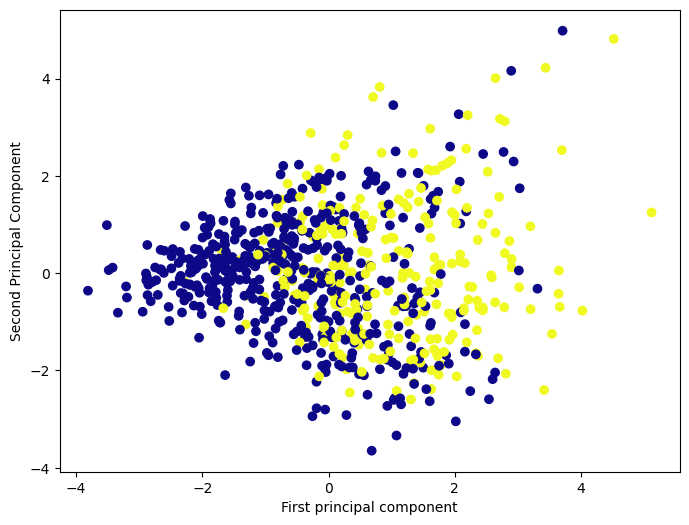

In [55]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df["Outcome"],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

**=> 데이터가 너무 섞여있음**

In [61]:
pca.components_

array([[ 0.30936023,  0.41446521,  0.39386822,  0.41859458,  0.19745207,
         0.42700162,  0.16890707,  0.39027418],
       [-0.5179399 ,  0.11506437, -0.20100125,  0.24106022,  0.42638121,
         0.34189972,  0.29423398, -0.48447594]])

In [63]:
df_comp = pd.DataFrame(pca.components_,columns=["Pregnancies","Glucose","BloodPressure",
                                                "SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"])

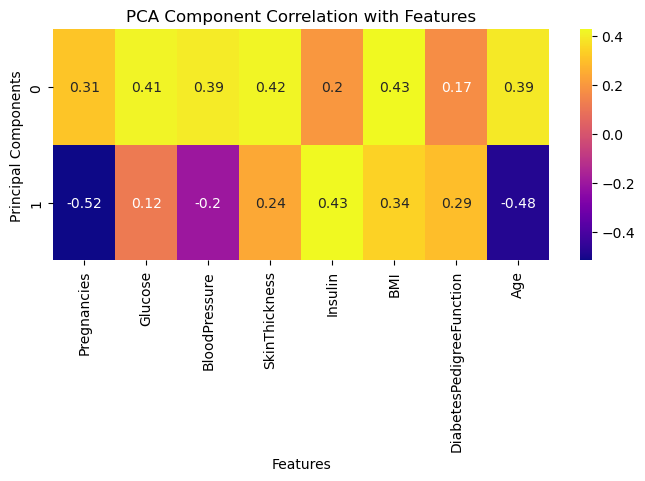

In [69]:
# 히트맵 시각화
plt.figure(figsize=(8, 3))
sns.heatmap(df_comp, cmap='plasma', annot=True)  # annot=True로 설정하면 값도 표시됩니다.
plt.title("PCA Component Correlation with Features")
plt.xlabel("Features")
plt.ylabel("Principal Components")
plt.show()

In [ ]:
## 위 결과를 통해 첫번째 주성분은 Glucose, BMI, SkinThickness와 같은 변수가 주로 기여하여 데이터의 분산을 설명
## 두번째 주성분은 Pregnancies, Age와 같은 변수가 부정적인 기여를 하며, Insulin과 BMI가 상대적으로 긍정적인 기여

## 이 데이터를 사용하여 머신러닝 모델을 학습시키고 성능을 평가

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=42)

# 모델 학습
model = LogisticRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

In [86]:
# 성능 평가
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# 결과 출력
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(confusion)
print('Classification Report:')
print(report)

Accuracy: 0.68
Confusion Matrix:
[[77 22]
 [27 28]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.78      0.76        99
           1       0.56      0.51      0.53        55

    accuracy                           0.68       154
   macro avg       0.65      0.64      0.65       154
weighted avg       0.68      0.68      0.68       154

